In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import seaborn as sns
import numpy as np
import math
import pandas as pd
from sklearn import preprocessing


plt.rcParams["figure.figsize"] = (40,6)




import warnings
warnings.filterwarnings('ignore')

/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# __=pd.read_csv('../Modelling/trimmed_dataset.csv',encoding='ISO-8859-1')
__=pd.read_csv('../../terrorism_new.csv',encoding='ISO-8859-1')

In [3]:
terror=__
# terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
# terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
# terror['casualities']=terror['Killed']+terror['Wounded']
# terror.head(3)
terror['nkillwound'] = terror['nkill'] + terror['nwound']


In [4]:
# __.nkill.value_counts()
terror = terror[terror["nkill"].notna()]
terror.shape

(180435, 136)

In [5]:
# __.nwound.value_counts()
terror = terror[terror["nwound"].notna()]
terror.shape

(173279, 136)

In [6]:
terror = terror[terror["nperps"].notna()]
terror = terror[terror["nperps"] != -99]
print(terror.shape)

(28139, 136)


In [8]:
# # __.propvalue.value_counts()
# terror = terror[terror["propvalue"].notna()]
# terror = terror[terror["propvalue"] != -99]
# terror.shape

(1002, 136)

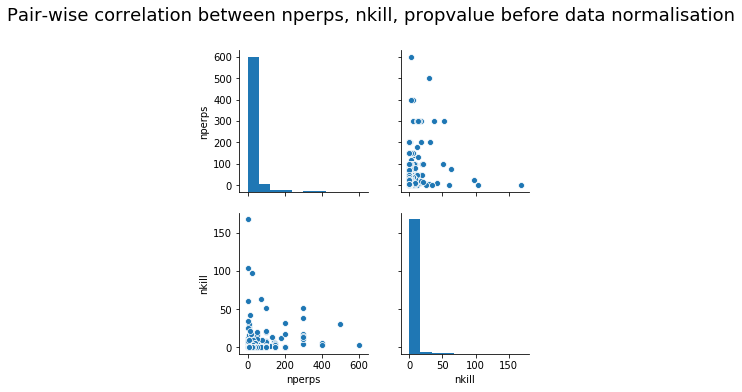

In [9]:
g = sns.pairplot(terror[['nperps', 'nkill']])
g.fig.suptitle("Pair-wise correlation between nperps, nkill, propvalue before data normalisation", y=1.08, fontsize=18) # y= some height>1
print(' ')

In [10]:
# terror = terror.sort_values(by=['propvalue'])
# terror = terror.reset_index(drop=True)
# terror.plot(y='propvalue', use_index=True)
# plt.title('Behaviour of propvalue', fontsize=60)
# plt.show()

In [11]:
# terror = terror.sort_values(by=['propvalue'])
# terror["propvalue"] = terror["propvalue"].replace(0, np.nan)
# terror["propvalue"] = np.log2(terror['propvalue'])
# terror["propvalue"] = terror["propvalue"].replace(np.nan, 0)
# terror = terror.reset_index(drop=True)

# terror.plot(y='propvalue', use_index=True)
# plt.title('Behaviour of propvalue after log transformation', fontsize=60)
# plt.show()

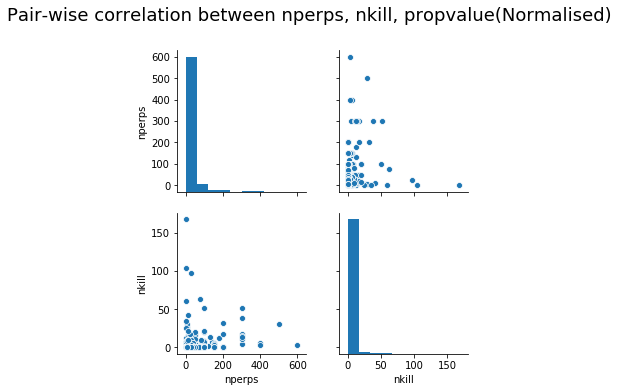

In [12]:
g = sns.pairplot(terror[['nperps', 'nkill']])
g.fig.suptitle("Pair-wise correlation between nperps, nkill, propvalue(Normalised)", y=1.08, fontsize=18) # y= some height>1
print(' ')

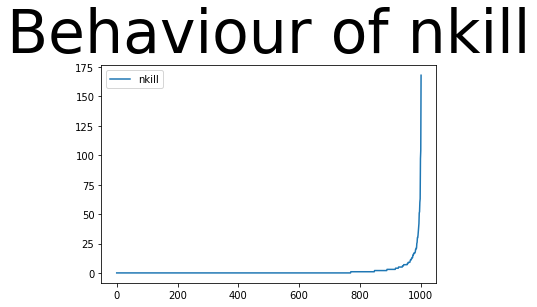

In [13]:
terror = terror.sort_values(by=['nkill'])
terror = terror.reset_index(drop=True)
terror.plot(y='nkill', use_index=True)

plt.title('Behaviour of nkill', fontsize=60)
plt.show()

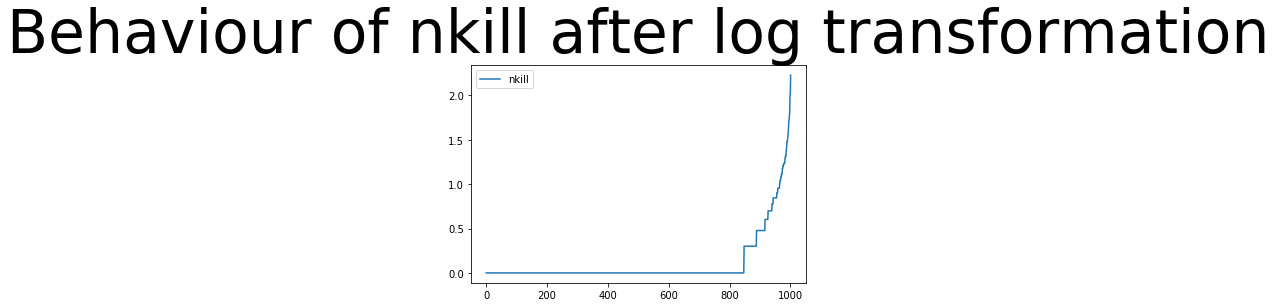

In [14]:
terror = terror.sort_values(by=['nkill'])
terror["nkill"] = terror["nkill"].replace(0, np.nan)
terror["nkill"] = np.log10(terror['nkill'])
terror["nkill"] = terror["nkill"].replace(np.nan, 0)
terror = terror.reset_index(drop=True)

terror.plot(y='nkill', use_index=True)

plt.title('Behaviour of nkill after log transformation', fontsize=60)
plt.show()

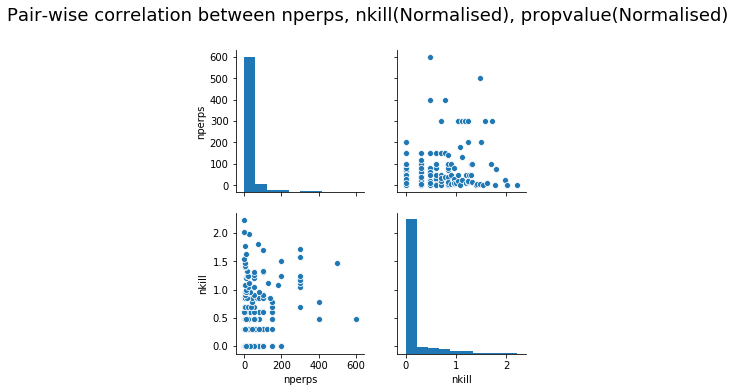

In [15]:
g = sns.pairplot(terror[['nperps', 'nkill']])
g.fig.suptitle("Pair-wise correlation between nperps, nkill(Normalised), propvalue(Normalised)", y=1.08, fontsize=18) # y= some height>1
print(' ')

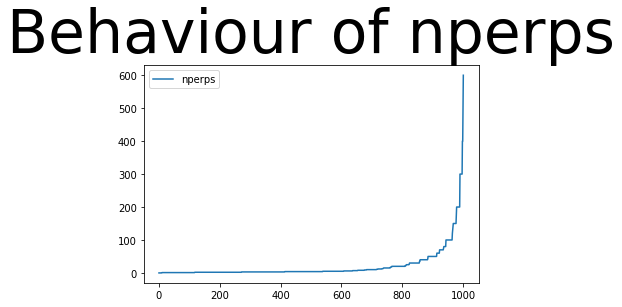

In [16]:
terror = terror.sort_values(by=['nperps'])
terror = terror.reset_index(drop=True)
terror.plot(y='nperps', use_index=True)

plt.title('Behaviour of nperps', fontsize=60)
plt.show()

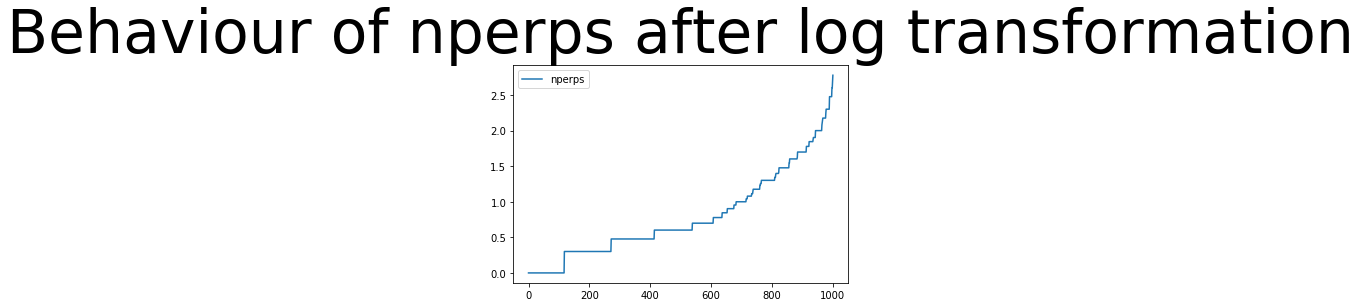

In [17]:
terror = terror.sort_values(by=['nperps'])
terror["nperps"] = terror["nperps"].replace(0, np.nan)
terror["nperps"] = np.log10(terror['nperps'])
terror["nperps"] = terror["nperps"].replace(np.nan, 0)
terror = terror.reset_index(drop=True)

terror.plot(y='nperps', use_index=True)

plt.title('Behaviour of nperps after log transformation', fontsize=60)
plt.show()

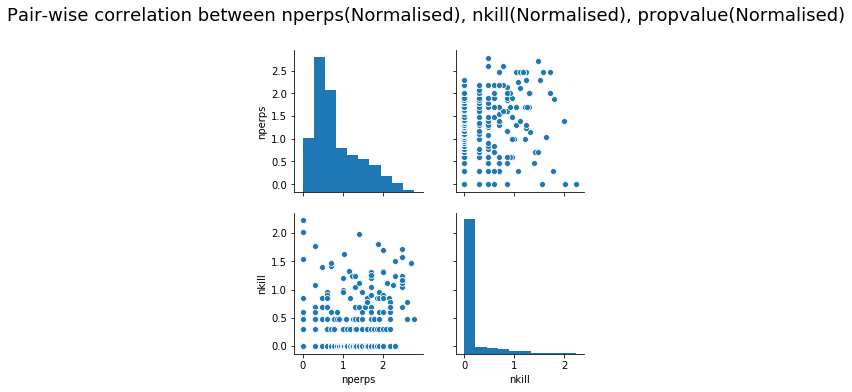

In [18]:
g = sns.pairplot(terror[['nperps', 'nkill']])
g.fig.suptitle("Pair-wise correlation between nperps(Normalised), nkill(Normalised), propvalue(Normalised)", y=1.08, fontsize=18) # y= some height>1
print(' ')

In [19]:
x = terror[['nperps', 'nkill']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
terror[['nperps', 'nkill']] = pd.DataFrame(x_scaled)
# terror['propvalue'].sample(10)

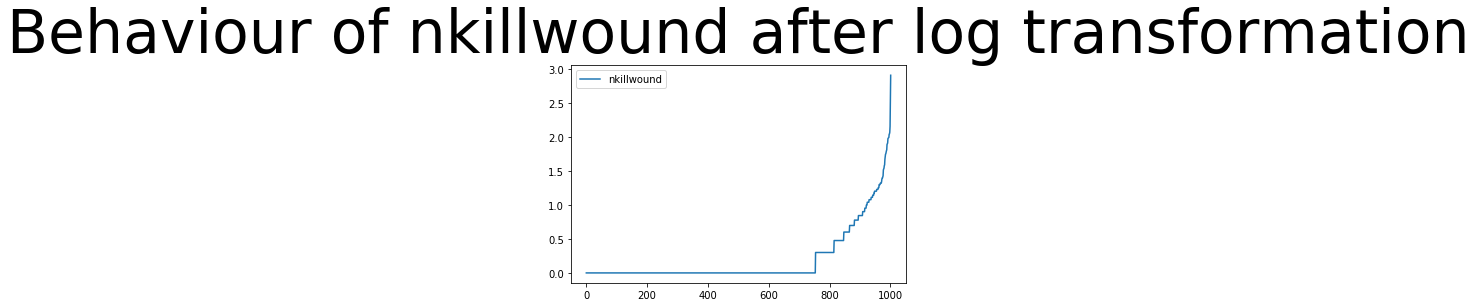

In [23]:
terror = terror.sort_values(by=['nkillwound'])
terror["nkillwound"] = terror["nkillwound"].replace(0, np.nan)
terror["nkillwound"] = np.log10(terror['nkillwound'])
terror["nkillwound"] = terror["nkillwound"].replace(np.nan, 0)
terror = terror.reset_index(drop=True)

terror.plot(y='nkillwound', use_index=True)

plt.title('Behaviour of nkillwound after log transformation', fontsize=60)
plt.show()

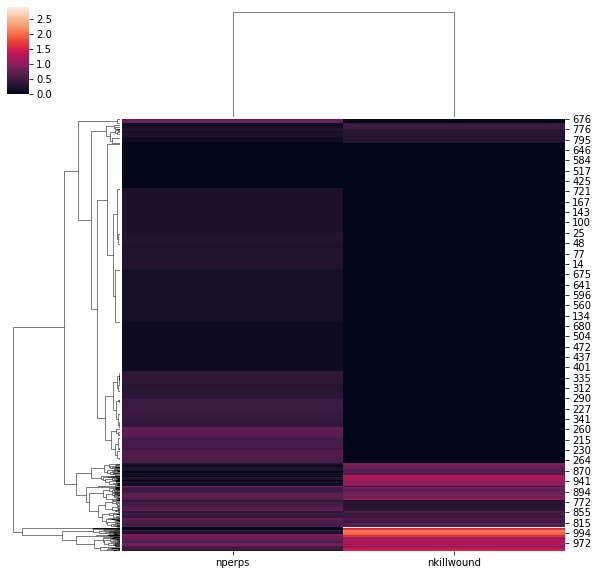

In [24]:
df = terror[['nperps','nkillwound']]
g = sns.clustermap(df)

In [ ]:
terror[['country_txt','region_txt','gname','nperps','nkill',"nwound", "propvalue"]].sample(10)

In [ ]:
terror['nkill'].value_counts()